In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

%matplotlib inline

pd.options.display.max_rows = 999

In [2]:
data_path = '../Data/'
df_max = pd.read_csv(data_path + 'clean_max.csv', index_col = 0, parse_dates = [3])
df_mar = pd.read_csv(data_path + 'clean_mar.csv', index_col = 0, parse_dates = [3])
df_sam = pd.read_csv(data_path + 'clean_sam.csv', index_col = 0, parse_dates = [3])

df_all = [df_max, df_mar, df_sam]
df_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 2137
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1887 non-null   int64  
 1   Session      1887 non-null   int64  
 2   ReceiptNum   1887 non-null   object 
 3   ReceiptDate  1521 non-null   object 
 4   Item         1887 non-null   object 
 5   Item2        27 non-null     object 
 6   Uncertain    34 non-null     object 
 7   Unknown      0 non-null      float64
 8   Quantity     1887 non-null   int64  
 9   Hit          0 non-null      float64
 10  Miss         0 non-null      float64
 11  Category     1871 non-null   object 
 12  Comment      222 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 206.4+ KB


In [3]:
# TODO: Checking for typos in ID, Session, ReceiptNum
valid_ids = [129, 136, 144, 147, 151, 156, 160, 112, 117, 120,
             128, 134, 143, 146, 150, 154, 159, 110, 115, 119,
             131, 139, 145, 149, 152, 157, 162, 113, 118, 126,
             121, 114, 137, 153, 141, 127, 130, 135, 148, 158]
valid_sessions = [1, 2, 3, 4, 5, 6]

assert all([df['ID'].isin(valid_ids).all() for df in df_all])
assert all([df['Session'].isin(valid_sessions).all() for df in df_all])

#TODO I think these receipt numbers should be contiguous
for pid in df_max['ID'].unique():
    for session in df_max.loc[df_max['ID'] == pid, 'Session'].unique():
        print(f'({pid}, {session})', df_max.loc[(df_max['ID'] == pid) & (df_max['Session'] == session), 'ReceiptNum'].unique())

(129, 1) ['1']
(129, 2) ['1']
(129, 3) ['1' '2' '3' '4']
(129, 4) ['1' '2']
(129, 5) ['1']
(136, 1) ['1' '4' '5' '6' '7']
(136, 2) ['1' '2' '3' '4' '5' '6' '7']
(136, 4) ['1' '2' '3' '4' '5' '6' '7' '8']
(136, 5) ['1' '2' '3' '4' '5' '7' '8' '9']
(121, 1) ['1']
(121, 2) ['1']
(121, 3) ['1']
(121, 4) ['1']
(121, 5) ['1']
(121, 6) ['1']
(114, 1) ['1' '2' '3']
(114, 2) ['1' '2']
(114, 3) ['1' '2']
(114, 4) ['2']
(114, 5) ['1']
(114, 6) ['1' '2' '3']
(137, 1) ['1' '2']
(137, 2) ['1']
(137, 3) ['1']
(137, 4) ['1' '2']
(137, 5) ['1']
(137, 6) ['1']
(153, 1) ['1' '2']
(153, 2) ['3' '4']
(153, 3) ['1']
(153, 4) ['1']
(153, 5) ['1' '2']
(141, 1) ['1']
(141, 2) ['1']
(141, 3) ['1']
(141, 4) ['1']
(141, 5) ['1' '2']
(127, 1) ['1' '2' '3']
(127, 2) ['1' '2' '3']
(127, 4) ['1']
(127, 5) ['1' '2' '3' '4']
(127, 6) ['1' '2']
(130, 2) ['1' '2' '3' '4' '5']
(130, 3) ['1' '2' '3' '4' '5' '6' '7']
(130, 4) ['1' '2' '3' '4']
(130, 5) ['1' '2' '3' '4']
(135, 1) ['1' '2' '3' '4']
(135, 2) ['1' '2' '3' '4' '

In [4]:
# Participant assignment verification
ids_assigned_max = {129, 136, 144, 147, 151, 156, 160, 112, 117, 120, 121, 114, 137, 153, 141, 127, 130, 135, 148, 158}
ids_assigned_mar = {128, 134, 143, 146, 150, 154, 159, 110, 115, 119, 121, 114, 137, 153, 141, 127, 130, 135, 148, 158}
ids_assigned_sam = {131, 139, 145, 149, 152, 157, 162, 113, 118, 126, 121, 114, 137, 153, 141, 127, 130, 135, 148, 158}

# All should be empty
print("Assigned particpant IDs missing from data set")
print("Max:", set(ids_assigned_max.difference(df_max['ID'].unique())))
print("Maria:", set(ids_assigned_mar.difference(df_mar['ID'].unique())))
print("Samantha:", set(ids_assigned_sam.difference(df_sam['ID'].unique())))

Assigned particpant IDs missing from data set
Max: {160, 112, 147, 148, 117, 151, 120, 156, 158}
Maria: set()
Samantha: set()


Max-Mar shared IDs:  set()
Max-Sam shared IDs:  set()
Mar-Sam shared IDs:  {148, 158}
Max-Mar-Sam shared IDs:  {130, 153, 135, 137, 141, 114, 121, 127}


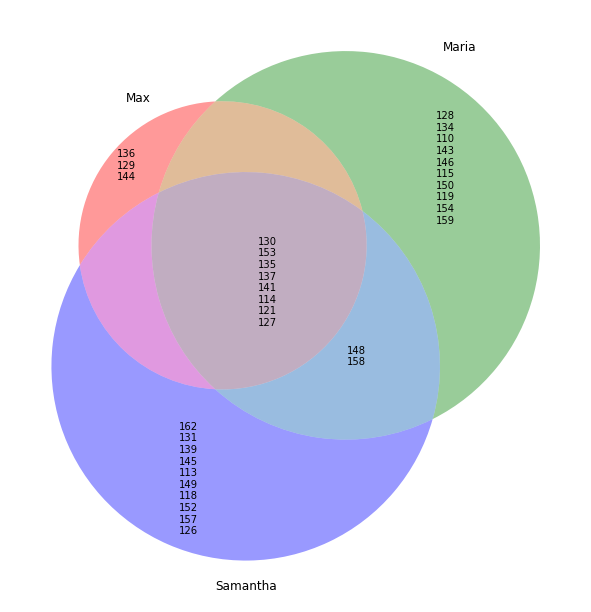

In [5]:
# Shared participant verification
max_ids = set(df_max.ID.unique())
mar_ids = set(df_mar.ID.unique())
sam_ids = set(df_sam.ID.unique())

# Venn diagram
plt.figure(figsize=(11,11))
v = venn3([max_ids, mar_ids, sam_ids], ('Max', 'Maria', 'Samantha'))

v.get_label_by_id('100').set_text('\n'.join(str(s) for s in (max_ids - mar_ids - sam_ids)))
v.get_label_by_id('110').set_text('\n'.join(str(s) for s in (max_ids & mar_ids - sam_ids)))
v.get_label_by_id('010').set_text('\n'.join(str(s) for s in (mar_ids - max_ids - sam_ids)))
v.get_label_by_id('101').set_text('\n'.join(str(s) for s in (max_ids - mar_ids & sam_ids)))
v.get_label_by_id('111').set_text('\n'.join(str(s) for s in (max_ids & mar_ids & sam_ids)))
v.get_label_by_id('011').set_text('\n'.join(str(s) for s in (mar_ids & sam_ids - max_ids)))
v.get_label_by_id('001').set_text('\n'.join(str(s) for s in (sam_ids - max_ids - mar_ids)))

plt.savefig('../Output/id_verification_venn_diagram.png')

# Pair-wise shared participants
max_mar_ids = max_ids & mar_ids - sam_ids
max_sam_ids = max_ids & sam_ids - mar_ids
mar_sam_ids = mar_ids & sam_ids - max_ids
shared_ids = max_ids & mar_ids & sam_ids
df_shared = []
for df in df_all:
    df_shared.append(df[df['ID'].isin(shared_ids)].copy())

# Shared participants: {121, 114, 137, 153, 141, 127, 130, 135, 148, 158}
print('Max-Mar shared IDs: ', max_mar_ids)
print('Max-Sam shared IDs: ', max_sam_ids)
print('Mar-Sam shared IDs: ', mar_sam_ids)
print('Max-Mar-Sam shared IDs: ', shared_ids)

In [6]:
### Basket item verification across shared participants

## Build multi-index (ID, BasketNum, ItemNum) 
for df in df_shared:
    # Generate BasketNum column
    df['BasketNum'] = np.nan    
    for pid in df['ID'].unique():
        basket_counter = 0
        
        for session in df.loc[df['ID'] == pid, 'Session'].unique():
            
            for receipt in df.loc[(df['ID'] == pid) & (df['Session'] == session), 'ReceiptNum'].unique():
                basket_counter += 1
                df.loc[(df['ID'] == pid) & (df['Session'] == session) & (df['ReceiptNum'] == receipt), 'BasketNum'] = basket_counter

    df['BasketNum'] = df['BasketNum'].astype('Int16')

    # Generate ItemNum column
    df['ItemNum'] = np.nan  
    for pid in df['ID'].unique():
        
        for basket in df.loc[df['ID'] == pid, 'BasketNum'].unique():
            df.loc[(df['ID'] == pid) & (df['BasketNum'] == basket), 'ItemNum'] = \
                    range(1, df.loc[(df['ID'] == pid) & (df['BasketNum'] == basket), 'ItemNum'].size + 1)

    df['ItemNum'] = df['ItemNum'].astype('Int16')
    df.drop(columns = ['Session', 'ReceiptNum'], inplace = True)

    # Create multi-index
    df.set_index(['ID', 'BasketNum', 'ItemNum'], inplace = True)
    df.sort_index(inplace = True)
    assert df.index.is_monotonic_increasing

In [7]:
## Statistics on shared multi-indicies
assert df_shared[0].index.unique(0).equals(df_shared[1].index.unique(0)) and df_shared[1].index.unique(0).equals(df_shared[2].index.unique(0)) 

# Symmetric difference of three sets = (A delta B delta C) - (A & B & C)
index_sym_diff = list(set(df_shared[0].loc[shared_ids].index.symmetric_difference(df_shared[1].loc[shared_ids].index).symmetric_difference(df_shared[2].loc[shared_ids].index).tolist()) \
      - set(df_shared[0].loc[shared_ids].index.intersection(df_shared[1].loc[shared_ids].index).intersection(df_shared[2].loc[shared_ids].index).tolist()))
index_sym_diff = sorted(sorted(sorted(index_sym_diff, key = lambda i: i[2]), key = lambda i: i[1]), key = lambda i: i[0])
print('Symmetric difference of three indices\n', index_sym_diff)

Symmetric difference of three indices
 [(114, 8, 5), (114, 8, 6), (114, 8, 7), (114, 8, 8), (114, 8, 9), (114, 8, 10), (114, 8, 11), (114, 8, 12), (114, 8, 13), (114, 10, 4), (114, 10, 5), (114, 10, 6), (114, 10, 7), (114, 10, 8), (114, 10, 9), (114, 10, 10), (114, 10, 11), (114, 10, 12), (114, 10, 13), (114, 10, 14), (114, 10, 15), (114, 10, 16), (114, 10, 17), (114, 13, 1), (114, 13, 2), (114, 13, 3), (114, 13, 4), (114, 13, 5), (114, 13, 6), (114, 13, 7), (114, 13, 8), (114, 13, 9), (114, 13, 10), (114, 13, 11), (114, 13, 12), (114, 13, 13), (114, 13, 14), (114, 13, 15), (114, 13, 16), (114, 14, 1), (114, 14, 2), (114, 14, 3), (114, 14, 4), (114, 14, 5), (114, 14, 6), (114, 14, 7), (114, 14, 8), (114, 14, 9), (114, 14, 10), (114, 14, 11), (114, 14, 12), (114, 14, 13), (121, 1, 49), (121, 4, 34), (121, 4, 35), (121, 5, 60), (121, 5, 61), (121, 5, 62), (127, 1, 13), (127, 2, 19), (127, 3, 10), (127, 3, 11), (127, 5, 11), (127, 5, 12), (127, 5, 13), (127, 5, 14), (127, 5, 15), (127, 5,

In [8]:
# TODO check for basket count agreement
for pid in df_shared[0].index.unique(0):
    print('\nID:', pid)
    for df in df_shared:
        print(df.loc[pid].index.unique(0)) # TODO restrict to PID


ID: 114
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object', name='BasketNum')

ID: 121
Index([1, 2, 3, 4, 5, 6], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6], dtype='object', name='BasketNum')

ID: 127
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='object', name='BasketNum')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='object', name='BasketNum')

ID: 130
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='object', name='BasketNum')
Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25],
      dtype='object', name='BasketNum')
Index([1, 2, 3, 4,

In [9]:
display(df_shared[0].loc[137, ['Item']].join(df_shared[1].loc[137, ['Item']], how = 'outer', lsuffix = '_0', rsuffix = '_1'))

Item_0  \
BasketNum ItemNum                                         
1         1                              cleaning wipes   
          2                              cleaning spray   
          3                                        book   
          4                                    slippers   
          5                                     tissues   
          6                                        tape   
          7                               video creator   
          8                              pickles (dill)   
          9                                       penne   
          10                                    carrots   
          11                               coffee beans   
          12                              chips (apple)   
          13                                    peanuts   
          14                   salad dressing (italian)   
          15                           dressing (ranch)   
          16                               coffee beans   
          17                              bread (wheat)   
          18                          popsicles (mango)   
          19                                        NaN   
2         1                             bread (italian)   
          2                         bread (whole wheat)   
          3                                      grapes   
          4                             brussel sprouts   
          5                                chips (corn)   
          6                                 blueberries   
          7                             english muffins   
          8                         bagels (everything)   
          9                              hamburger buns   
          10                                      salsa   
3         1                                        milk   
          2                            chicken (thighs)   
          3                            yogurt (yoplait)   
          4                           butter (unsalted)   
          5                                strawberries   
          6                           hydrogen peroxide   
          7                    cream (personal product)   
          8                                paper towels   
          9                             english muffins   
          10                            brussel sprouts   
          11                               chips (corn)   
          12                                       eggs   
          13                             wafers (crème)   
4         1                              chips (potato)   
          2                    salad dressing (italian)   
          3                              salad dressing   
          4                              pickles (dill)   
          5                       pickles (dill kosher)   
          6                            soda (coca cola0   
          7                     juice (cranberry mango)   
          8                               beans (pinto)   
          9                              beans (kidney)   
          10                                beans (red)   
          11                            bar (blueberry)   
          12                                granola bar   
          13                              cereal (life)   
          14               oatmeal (raisin date walnut)   
          15                                     rotini   
          16                                 mayonnaise   
          17                               hot dog buns   
          18                        bread (whole wheat)   
          19                          london broil meal   
          20                                 pork chops   
          21                               chips (corn)   
          22                                     garlic   
          23                           yogurt (coconut)   
          24                 yogurt (strawberry banana)   
          25                         